# Laboratorio 4


1. Silvia Illescas 22376
2. Michelle Mejia 22596

## Task 1

### ¿Qué son los grafos computacionales y cuál es su importancia para el cálculo de gradientes en aplicaciones como backpropagation?

Los grafos computacionales son representaciones estructuradas de cálculos matemáticos, donde los nodos representan operaciones y los bordes representan los flujos de datos. Son importantes para el cálculo de gradientes, ya que permiten calcular eficientemente las derivadas de las funciones durante el proceso de retropropagación (backpropagation) en redes neuronales. La retropropagación utiliza el grafo para aplicar la regla de la cadena y ajustar los pesos de la red según el error calculado.

### ¿Cuáles son los componentes y pasos que conforman una red neuronal? Con esto en mente, ¿cómo mejoraría el perceptrón que se hizo en el laboratorio pasado?

Los componentes de una red neuronal incluyen entradas, pesos, funciones de activación, neuronas y salidas. Los pasos en una red neuronal son: 1) Propagación hacia adelante (calcular salidas), 2) Cálculo del error (comparar la salida predicha con la real), 3) Retropropagación (ajustar los pesos) y 4) Actualización de los pesos mediante un algoritmo de optimización como el gradiente descendente. Para mejorar el perceptrón, se podría agregar una capa oculta y usar funciones de activación no lineales, como la sigmoide o ReLU, para manejar problemas más complejos.

### ¿Cómo se selecciona el valor K usando el método de la silueta para el algoritmo de K-Means? Explique las fórmulas que lo componen así como las suposiciones.

El método de la silueta se usa para determinar el número óptimo de clústeres (K) en K-Means. Se calcula la cohesión (a) de cada punto con su propio clúster y la separación (b) con el clúster más cercano. La silueta de un punto es s(i)=  b(i)−a(i) / max(a(i),b(i)). El valor de K se elige cuando el valor promedio de la silueta es máximo. Las suposiciones incluyen que los clústeres son esféricos y tienen tamaños similares, lo cual puede no ser siempre el caso.

### ¿Cómo podría ayudarme a mejorar la calidad de sus clusters cuando se usa K-Means el análisis de componentes principales (PCA)?

PCA ayuda a reducir la dimensionalidad de los datos, lo que puede hacer que los clústeres sean más fáciles de identificar. Al reducir las dimensiones, PCA elimina el ruido y resalta las principales características que contribuyen a las diferencias entre los clústeres. Esto puede mejorar la calidad de los clústeres generados por K-Means, especialmente cuando las características tienen alta correlación y afectan la precisión del algoritmo.

## Task 2

Task 2.1

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB
None
       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.046198e+06     1.048567e+06             1.048567e+06
mean         1.154035e+05     1.570875e+05             1.574335e+03


C:\Users\Silvia\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


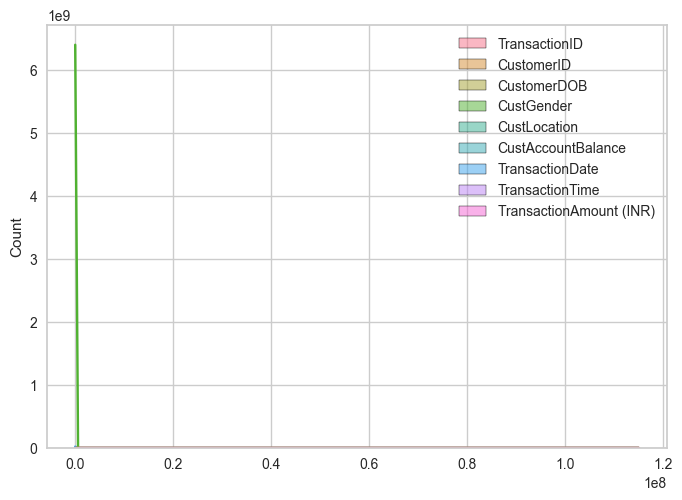

c:\Python312\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Python312\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


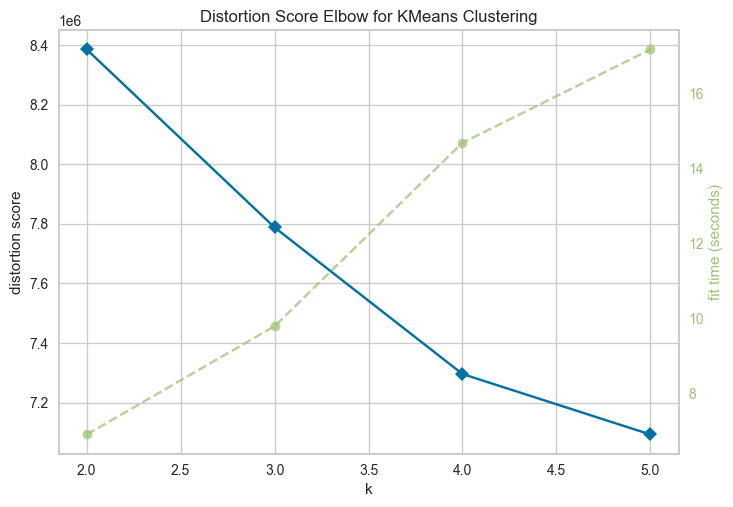

Advertencia: No se detectó el número óptimo de clusters. Se usará k=3 por defecto.


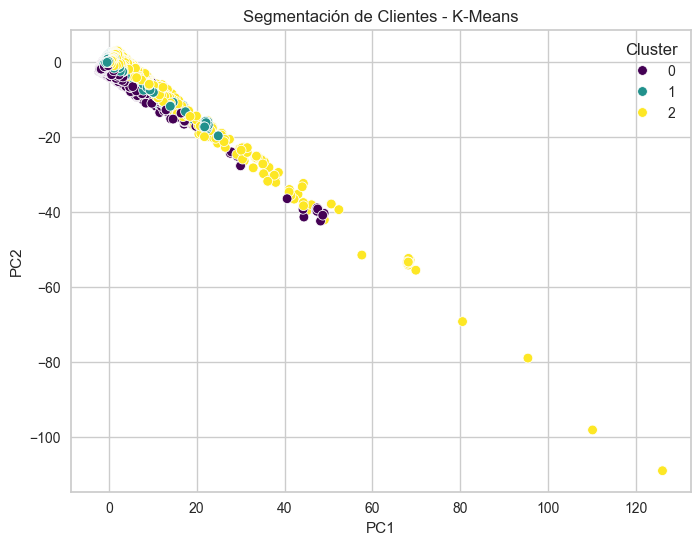

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

# Cargar el dataset
df = pd.read_csv("bank_transactions.csv")

# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Tratamiento de outliers en CustAccountBalance y TransactionAmount (INR)
df['CustAccountBalance'] = np.log1p(df['CustAccountBalance'])
df['TransactionAmount (INR)'] = np.log1p(df['TransactionAmount (INR)'])

# Codificación de variables categóricas
for col in ['CustGender', 'CustLocation']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Escalar las variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']])

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Método del codo con ajuste de parámetros
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,6), locate_elbow=False)
visualizer.fit(df_pca)
visualizer.show()

# Definir número óptimo de clusters
optimal_k = visualizer.elbow_value_ if visualizer.elbow_value_ else 3

# Mostrar primeras filas del dataset
display(df.head())

# Información general del DataFrame
print(df.info())

# Estadísticas descriptivas del DataFrame
print(df.describe())

# Verificación de valores nulos en cada columna
print(df.isnull().sum())

# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)
df_pca_df['Cluster'] = df['Cluster']

# Visualización de los clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_df, palette='viridis')
plt.title("Segmentación de Clientes - K-Means")
plt.show()

# Guardar resultados
df.to_csv("clientes_segmentados.csv", index=False)


Task 2.1

In [ ]:
##

# Task 2.2

Al igual que el task anterior, deberá construir un modelo basado en aprendizaje no supervisado para el dataset dado.
Lo que se busca con este modelo es poder segmentar a clientes de una entidad bancaria para poder así tomar
decisiones a nivel comercial y potenciar las operaciones de la empresa. Recuerden que:

1. Revisen la breve exploración de datos que hicieron previamente. No es necesario que lo repitan acá dado
que ya lo hicieron antes y es el mismo dataset. Pero recuerden que:
2. Deben seleccionar las variables para este modelo (si aplica)
3. Tengan sus features escaladas
4. Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

In [ ]:
##

# Task 2.2.1

Para este task no usen librerías, sino implementen el algoritmo por ustedes mismos. Pueden usar librerías para la
lectura del archivo, métricas de desempeño, división de dataset, etc. Pero el algoritmo principal deben hacerlo
ustedes.
Recuerden que el dataset está en este enlace. Con esto, implemente un modelo de Mixture Models para segmentar
a los clientes en la cantidad de grupos que ustedes decidan. Para ello considere lo siguiente
1. Si considera necesario haga split del dataset como en los laboratorios anteriores
2. Recuerde que es un problema de aprendizaje no supervisado
3.  Seleccione el número de clusters que mejor se adapte al dataset. Justifique su elección
4. ¿Podría PCA ayudarle a mejorar sus clusters? ¿Por qué?
5. Muestre al menos una gráfica que muestre cómo se dividen los clusters seleccionados
6. Seleccione dos features, justifique su elección
7. Puede considerar investigar sobre Principal Component Analysis (PCA)
8. Recuerde mostrar la covarianza como una elipse para cada uno de los clusters
9. Provea una métrica de desempeño, justificando su elección


In [10]:
##

Compare sus resultados con los que obtuvo en el task 2.1
1. ¿Cuál es mejor? ¿Por qué?
2. Considerando sus resultados, ¿cuándo cree que es mejor usar Mixture Models y K-Means?

In [11]:
#

Repita los pasos para entrenar su modelo, pero ahora usando librerías y compare los resultados. ¿Cuál
implementación fue mejor? ¿Por qué? (Responda como parte de su Jupyter Notebook en una celda
markdown)



In [12]:
#Code con librerias